# Introduction to Density Functional Theory

## Examples

We will study two systems:
 1. Silicon
 2. H2 molecule

### Silicon
This example is following the [DFTK.jl](https://juliamolsim.github.io/DFTK.jl/) documentation for an [example of how to use their code](https://juliamolsim.github.io/DFTK.jl/stable/guide/tutorial/).

In [143]:
using DFTK
using Plots
using Unitful
using UnitfulAtomic

Julia comes with its own package manager, so adding new packages is very easy. Simply type ```]``` to enter package mode in the Julia REPL. Then type

```add your new package here```

Julia will take care of the rest!

The first step any dft calculation is to define the crystal (or molecular) structure that we would like to study. In DFTK.jl, we do this as follows

In [144]:
a = 5.431u"angstrom" # Lattice constant for Silicon; the Unitful package let's specify
                     # values in units other than DFTK.jl's internal units.
lattice = 0.5*a*[[0 1. 1.];
                 [1. 0. 1.]; 
                 [1. 1. 0.]] # Lattice/basis vectors for the Silicon crystal. (Column format)
                                                 

3×3 Array{Quantity{Float64,𝐋,Unitful.FreeUnits{(Å,),𝐋,nothing}},2}:
    0.0 Å  2.7155 Å  2.7155 Å
 2.7155 Å     0.0 Å  2.7155 Å
 2.7155 Å  2.7155 Å     0.0 Å

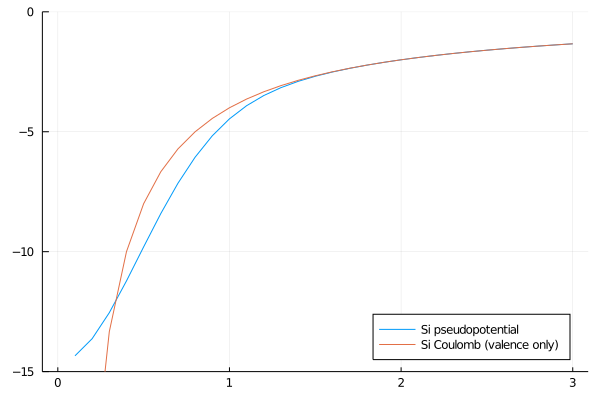

In [145]:
# pseudopotential
Si_pseudo = ElementPsp(:Si, psp=load_psp("hgh/lda/Si-q4"))

# all-electron
Si_coulomb = ElementCoulomb(:Si)

rs = collect(0:0.1:3)
p = plot(ylims=(-15, 0), legend=:bottomright)
plot!(p, rs, DFTK.local_potential_real.(Ref(Si_pseudo), rs), label="Si pseudopotential")
plot!(p, rs, -4 ./ abs.(rs), label="Si Coulomb (valence only)")

In [146]:
atoms = [Si_pseudo => [ones(3)/8, -ones(3)/8]] # positions of atoms in the basis of lattice vectors

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(14, :Si, PspHgh(4, 0.44, [-7.33610297, 0.0, 0.0, 0.0], 1, [0.42273813, 0.48427842], [[5.90692831 -1.26189397; -1.26189397 3.25819622], [2.72701346]], "hgh/lda/si-q4", "Si GTH-PADE-q4 GTH-LDA-q4")) => [[0.125, 0.125, 0.125], [-0.125, -0.125, -0.125]]

In [147]:
model = model_LDA(lattice, atoms)
kgrid = [5, 5, 5];
Ecut = 190.5u"eV";

In [148]:
basis = PlaneWaveBasis(model, Ecut; kgrid = kgrid)

PlaneWaveBasis (Ecut=7.000745874436293, 10 kpoints)

In [149]:
scfres = self_consistent_field(basis, tol=1e-8)

n     Energy            Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -7.902949681046         NaN   1.97e-01    3.6 
  2   -7.907582452428   -4.63e-03   2.98e-02    1.0 
  3   -7.907827666759   -2.45e-04   3.01e-03    1.4 
  4   -7.907855255202   -2.76e-05   1.25e-03    2.7 
  5   -7.907855933338   -6.78e-07   5.76e-04    1.2 
  6   -7.907856116770   -1.83e-07   1.81e-05    1.2 
  7   -7.907856124997   -8.23e-09   6.74e-06    2.9 


(ham = Hamiltonian(PlaneWaveBasis (Ecut=7.000745874436293, 10 kpoints), HamiltonianBlock[HamiltonianBlock(PlaneWaveBasis (Ecut=7.000745874436293, 10 kpoints), Kpoint{Float64}(Model{Float64}([0.0 5.131551291421279 5.131551291421279; 5.131551291421279 0.0 5.131551291421279; 5.131551291421279 5.131551291421279 0.0], [-0.6122110985895788 0.6122110985895788 0.6122110985895789; 0.6122110985895788 -0.6122110985895788 0.6122110985895789; 0.6122110985895789 0.6122110985895789 -0.6122110985895789], 270.25641916692047, 0.917832827827092, 3, 8, :none, 1, 0.0, DFTK.Smearing.None(), Pair{Any,Array{StaticArrays.SArray{Tuple{3},Float64,1,3},1}}[ElementPsp(14, :Si, PspHgh(4, 0.44, [-7.33610297, 0.0, 0.0, 0.0], 1, [0.42273813, 0.48427842], [[5.90692831 -1.26189397; -1.26189397 3.25819622], [2.72701346]], "hgh/lda/si-q4", "Si GTH-PADE-q4 GTH-LDA-q4")) => [[0.125, 0.125, 0.125], [-0.125, -0.125, -0.125]]], Any[Kinetic(1), AtomicLocal(), AtomicNonlocal(), Ewald(), PspCorrection(), Hartree(1), Xc([:lda_xc_t

In [150]:
scfres.energies

Energy breakdown:
    Kinetic             3.0882014 
    AtomicLocal         -2.1873805
    AtomicNonlocal      1.7315248 
    Ewald               -8.3979253
    PspCorrection       -0.2946254
    Hartree             0.5462370 
    Xc                  -2.3938880

    total               -7.907856124997


In [151]:
hcat(scfres.occupation...)

7×10 Array{Float64,2}:
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:02


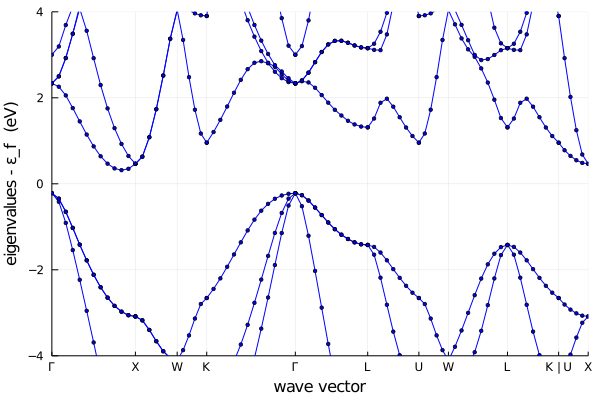

In [168]:
plot_bandstructure(scfres, kline_density=10)

In [138]:
cubic = 10 *[[1 0 0]; [0 1 0]; [0 0 1]];
H = ElementPsp(:H, psp=load_psp("hgh/lda/H-q1"));
lengths = collect(0.5:0.025:0.9)
molecules = [ [H => [zeros(3), [len, 0., 0.]]] for len in lengths];
kgrid = [1, 1, 1];
Ecut = 5;

In [139]:
energies = [];
foreach(molecules) do atom
    model = model_LDA(cubic, atom)
    basis = PlaneWaveBasis(model, Ecut; kgrid = kgrid)
    scfres = self_consistent_field(basis, tol=1e-8, callback=info->nothing);
    push!(energies, scfres.energies.total)
end

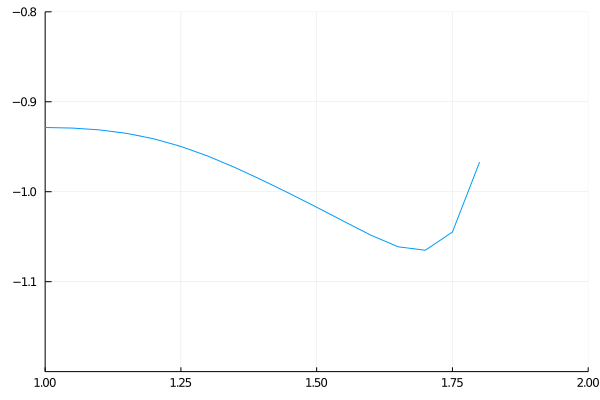

In [142]:
plot(2*lengths, energies, ylims=(-1.2, -0.8), xlims=(1, 2), label ="")